## Introduction

Our company is entering the film industry by launching a new movie studio but lacks experience in film production. We are tasked with analyzing current box office trends to identify successful film types. The goal is to translate these insights into actionable recommendations that will guide the studio head in creating films that align with market preferences and drive success.

## Problem Statement
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Objectives
1. Evaluate the performance of various film genres in both domestic and international markets.
2. Identify the movie studios that consistently produce high-performing films.
3. Investigate the correlation between production budgets and both domestic and international revenues.
4. Examine trends in film production over time.
5. Assess the impact of a film's popularity score and average rating on its overall performance.

## Data
Datasets used were obtained from:
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)


## Exploratory Data Analysis

In [2]:
#Import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Loading the data

In [3]:
# Load the movie gross data
movie_gross=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\bom.movie_gross.csv.gz', compression='gzip')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# Load the movie data
movie_data=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\tmdb.movies.csv.gz', compression='gzip')
movie_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Load the movie budget data
movie_budget=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\tn.movie_budgets.csv.gz', compression='gzip')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# Load the movie info data
movie_info=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\rt.movie_info.tsv.gz', sep='\t', compression='gzip')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
# Load the reviews data
reviews=pd.read_csv('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\rt.reviews.tsv.gz', sep='\t',encoding='ISO-8859-1', compression='gzip')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [8]:
# Load the database
# Create a connection
conn=sqlite3.connect('D:\\MORINGA\\PHASE2_PROJECT-inferential-statistics-\\data\\im.db')

In [9]:
# Create a cursor
cursor=conn.cursor()

In [10]:
cursor.execute("SELECT * FROM sqlite_master;")
print(cursor.fetchall())

[('table', 'movie_basics', 'movie_basics', 2, 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)'), ('table', 'directors', 'directors', 3, 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)'), ('table', 'known_for', 'known_for', 4, 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)'), ('table', 'movie_akas', 'movie_akas', 5, 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)'), ('table', 'movie_ratings', 'movie_ratings', 6, 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)'), ('table', 'persons', 'persons', 7, 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_professi

In [11]:
# Check the tables within our database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables=cursor.fetchall()

for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [12]:
movie_basics=pd.read_sql("""SELECT *
            FROM movie_basics
            ;""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [13]:
movie_akas=pd.read_sql("""SELECT *
            FROM movie_akas
            ;""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [14]:
# Movie ratings
movie_ratings=pd.read_sql("""SELECT *
            FROM movie_ratings
            ;""", conn)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Data Description

**Movie_gross**

In [15]:
# Data overview
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# movie_gross descriptive statistics
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


**Movie Data**

In [17]:
# Data overview
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
# movie_data descriptive statistics
movie_data.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


**Movie_budget**

In [19]:
# Data overview
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning

**Movie_gross data**

In [20]:
# Check for total missing values
movie_gross.isna().sum().sort_values()

title                0
year                 0
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64

> The movie gross data has some missing values in the columns; studio, domestic_gross and foreign_gross

In [21]:
# Filling the missing values with 0
movie_gross['domestic_gross'].fillna(0)
movie_gross['foreign_gross'].fillna(0)

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [22]:
# Checking for total duplicates
movie_gross.duplicated().sum()


0

> The movie gross data has no duplicates.

**movie_data**

In [23]:
# Check for missing values
movie_data.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [24]:
# Check for duplicates
movie_data.duplicated().sum()

0

In [25]:
# Drop unnecessary columns
movie_data.drop(columns=['original_language'])


,Unnamed: 0,genre_ids,id,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


**Movie_budget data**

In [26]:
# Check for missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
# Check for duplicates
movie_budget.duplicated().sum()

0

> The movie_budget data has no missing data. The data has no duplicates

In [28]:
# Remove the $ in the production_budget, domestic_gross and worldwide gross columns
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [29]:
# Get rid of the commas
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',', '')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',', '')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [30]:
# Convert the values from str to float
movie_budget['production_budget'] = movie_budget['production_budget'].astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype(float)

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [31]:
# convert  release_date to date time object 
movie_budget['release_date'] =  pd.to_datetime(movie_budget['release_date'])
movie_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


**Movie_basics**

In [32]:
# Check for missing values
movie_basics.isna().sum().sort_values()

movie_id               0
primary_title          0
start_year             0
original_title        21
genres              5408
runtime_minutes    31739
dtype: int64

In [33]:
# Check for duplicates
movie_basics.duplicated().sum()

0

**movie_akas**

In [34]:
# Check for missing values
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [35]:
# Drop unnecessary columns
movie_akas.drop(columns=['types', 'language', 'attributes', 'is_original_title','ordering'])

,movie_id,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,None
331699,tt9827784,Farewell Song,XWW
331700,tt9880178,La atención,None
331701,tt9880178,La atención,ES


In [36]:
# Check for duplicates
movie_akas.duplicated().sum()

0

**movie_ratings**

In [37]:
# Check for missing values
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [38]:
# Check for duplicates
movie_akas.duplicated().sum()

0

> Movie_ratings has no duplicates. There are no missing values

#### Data Merging

In [ ]:
# Merge the movie_gross data and movie_data
movies_gross_data=movie_gross.merge(movie_data, how='inner', on='title')

# Merge the movie_gross_data and movie_budget dataframes
# Rename the movie column in movie_budget df to align with title column in movies-gross_data
movie_budget=movie_budget.rename(columns={'movie':'title'})
movies_merge=movies_gross_data.merge(movie_budget, how='inner', on='title')
movies_merge

,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,53,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54,100,2018-02-02,30000000.0,490973.0,6.485990e+05
1391,Mandy,RLJ,1200000.0,NaN,2018,20499,[18],499658,en,Mandy,0.600,2016-01-24,3.5,2,71,2018-09-14,6000000.0,1214525.0,1.427656e+06
1392,Mandy,RLJ,1200000.0,NaN,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,Mandy,16.240,2018-09-13,6.2,618,71,2018-09-14,6000000.0,1214525.0,1.427656e+06
1393,Lean on Pete,A24,1200000.0,NaN,2018,20908,"[18, 12]",407890,en,Lean on Pete,9.307,2018-04-06,6.9,133,13,2018-04-06,8000000.0,1163056.0,2.455027e+06


In [ ]:
# Merge the movie_basics, movie_ratings and the movie_akas tables
movies=pd.read_sql("""SELECT *
                   FROM movie_basics
                   JOIN movie_akas USING (movie_id)
                   JOIN movie_ratings USING (movie_id)
                   ;""", conn)
movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,Sunghursh,None,None,original,None,1.0,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,None,None,None,0.0,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,hi,None,alternative transliteration,0.0,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,hi,None,alternative spelling,0.0,7.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,2,Sisterleaf,IN,en,None,literal English title,0.0,8.4,600
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,3,Pengalila,IN,None,None,None,0.0,8.4,600
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0,8.4,365
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0,8.4,365


In [ ]:
all_movies=movies.merge(movies_merge, how='inner', on='title')
all_movies

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,ordering,title,region,language,...,original_title_y,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",15,On the Road,None,None,...,On the Road,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,2,On the Road,None,None,...,On the Road,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,2,On the Road,GB,None,...,On the Road,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,3,On the Road,None,None,...,On the Road,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
4,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,1,Whiplash,US,None,...,Whiplash,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",25,Instant Family,US,None,...,Instant Family,22.634,2018-11-16,7.6,782,20,2018-11-16,48000000.0,67363237.0,119736188.0
7489,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",2,Hereditary,ES,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
7490,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",8,Hereditary,None,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
7491,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",9,Hereditary,US,None,...,Hereditary,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0


In [ ]:
columns_to_drop = [col for col in ['ordering', 'original_title_x','types','region', 'attributes','is_original_title', 'is_original_language', 'language', 'original_title_y', 'original_language'] if col in all_movies.columns]
all_movies.drop(columns=columns_to_drop, inplace=True)
all_movies

,movie_id,primary_title,start_year,runtime_minutes,genres,title,averagerating,numvotes,studio,domestic_gross_x,...,id_x,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,IFC,744000.0,...,83770,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
1,tt4339118,On the Road,2014,89.0,Drama,On the Road,6.0,6,IFC,744000.0,...,83770,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
2,tt5647250,On the Road,2016,121.0,Drama,On the Road,5.7,127,IFC,744000.0,...,83770,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
3,tt5647250,On the Road,2016,121.0,Drama,On the Road,5.7,127,IFC,744000.0,...,83770,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0
4,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,13100000.0,...,367412,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",Instant Family,7.4,46728,Par.,67400000.0,...,491418,22.634,2018-11-16,7.6,782,20,2018-11-16,48000000.0,67363237.0,119736188.0
7489,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
7490,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0
7491,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,493922,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0


**Objective 1: Evaluate the performance of various film genres in both domestic and international markets.**
> This is based on the profits(worldwide_gross-production_budget)


In [ ]:
# Profits
all_movies['Profits']=(all_movies['worldwide_gross'] + all_movies['domestic_gross_x'])-all_movies['production_budget']
all_movies

,movie_id,primary_title,start_year,runtime_minutes,genres,title,averagerating,numvotes,studio,domestic_gross_x,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross,Profits
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,IFC,744000.0,...,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0,-14942698.0
1,tt4339118,On the Road,2014,89.0,Drama,On the Road,6.0,6,IFC,744000.0,...,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0,-14942698.0
2,tt5647250,On the Road,2016,121.0,Drama,On the Road,5.7,127,IFC,744000.0,...,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0,-14942698.0
3,tt5647250,On the Road,2016,121.0,Drama,On the Road,5.7,127,IFC,744000.0,...,8.919,2012-12-21,5.6,518,17,2013-03-22,25000000.0,720828.0,9313302.0,-14942698.0
4,tt0339736,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,SPC,13100000.0,...,6.298,2013-01-18,7.9,94,43,2014-10-10,3300000.0,13092006.0,38969037.0,48769037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",Instant Family,7.4,46728,Par.,67400000.0,...,22.634,2018-11-16,7.6,782,20,2018-11-16,48000000.0,67363237.0,119736188.0,139136188.0
7489,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104233905.0
7490,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104233905.0
7491,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,7.3,151571,A24,44100000.0,...,26.185,2018-06-08,7.0,2491,56,2018-06-08,10000000.0,44069456.0,70133905.0,104233905.0


In [ ]:
all_movies['genre_1']=all_movies['genres'].str.split(',').str[0]
top_genre =all_movies.groupby('genre_1')['Profits'].sum().sort_values(ascending=False)
print(top_genre)

genre_1
Action         8.819602e+11
Adventure      3.032976e+11
Comedy         1.171950e+11
Drama          1.061682e+11
Biography      8.792104e+10
Horror         8.160884e+10
Crime          3.184725e+10
Animation      1.759978e+10
Mystery        1.046239e+10
Documentary    9.730662e+09
Fantasy        6.260305e+09
Family         4.177079e+09
Thriller       3.440587e+09
Sci-Fi         2.167467e+09
Romance        1.275493e+09
Musical        1.291538e+07
Sport         -1.590899e+07
Name: Profits, dtype: float64


Text(0.5, 1.0, 'Top Genres by Profits')

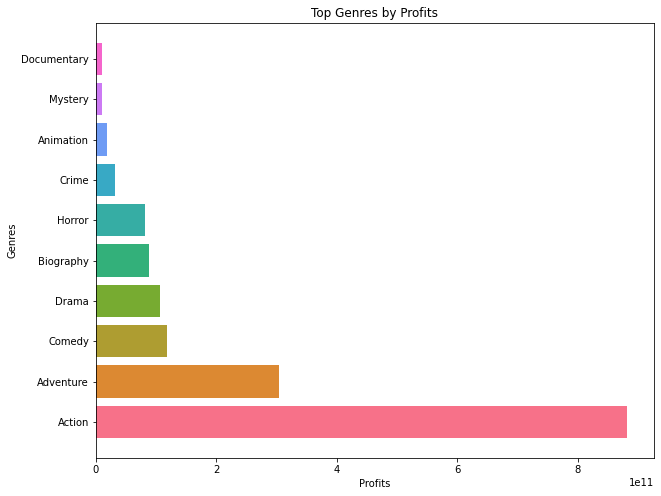

In [ ]:
top_genre_df=top_genre.reset_index().head(10)
# Plot the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Colors for each genre
colors = sns.color_palette("husl", len(top_genre_df))

# PLot the bar graph
ax.barh(top_genre_df['genre_1'], top_genre_df['Profits'], color=colors)

# Add labels and title
ax.set_xlabel('Profits')
ax.set_ylabel('Genres')
ax.set_title('Top Genres by Profits')

**Observation**
> Action genre had the highest profits

**Objective 2: Identify the movie studios that consistently produce high-performing films**
> This is based on the profits made

In [ ]:
# Calculate total profits for each studio
studio_profits=all_movies.groupby('studio')['Profits'].sum().sort_values(ascending=False)
studio_profits

studio
BV        4.454483e+11
Uni.      2.549008e+11
Fox       2.041195e+11
WB        2.031551e+11
Sony      1.429585e+11
              ...     
BG       -1.335128e+08
Amazon   -1.465154e+08
KE       -2.147154e+08
Free     -2.221234e+08
Anch.    -3.703140e+08
Name: Profits, Length: 88, dtype: float64

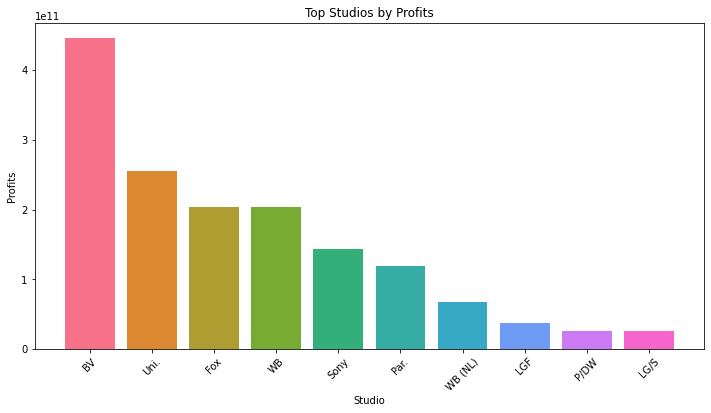

In [ ]:
studio_profits_df=studio_profits.reset_index(drop=False).head(10)
#studio_foreign=studio_foreign_gross.reset_index().head(10)


# Plot figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the bar graph
ax1.bar(studio_profits_df['studio'], studio_profits_df['Profits'], color=colors)


# Add labels and title for ax1
ax1.set_xlabel('Studio')
ax1.set_ylabel('Profits')
ax1.set_title('Top Studios by Profits')
ax1.tick_params(axis='x', rotation=45)


**Observation**
> The bar plot shows the top 10 most successful studios in terms of profit.
BV has made the highest profits followed by Uni and Fox. LG/S has the lowest profits in the top 10 list.

**Objective 3: Examine trends in film production over time.**

In [ ]:
# Create a new column (Year)
all_movies['release_year']=all_movies['release_date_y'].dt.year
movies_per_year= all_movies['release_year'].value_counts().sort_values()
movies_per_year

2005       2
2006       5
1984       5
1999       7
1967       8
2003      11
2001      18
1986      37
2014     671
2012     709
2013     747
2018     764
2017     796
2010     817
2011     825
2015    1008
2016    1063
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Number of Movies per Year')

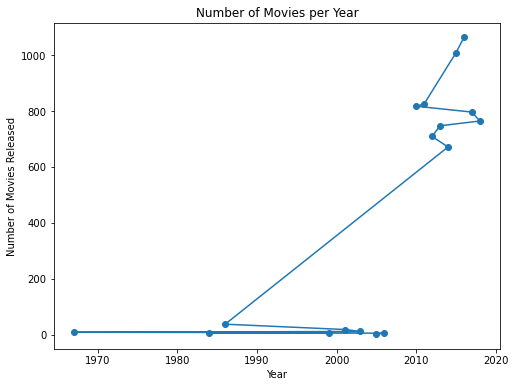

In [ ]:
# Plot figure,axes
fig, ax=plt.subplots(figsize=(8,6))

ax.plot(movies_per_year.index, movies_per_year.values, marker='o')
#Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies Released')
ax.set_title('Number of Movies per Year')


**Observation**
> The plot shows a trend with a ow production from 1967 to 2006 , followed by a sharp and sudden increase leading to a cluster of points that then start to spread and fluctuate more

**Objective 4: Investigate the correlation between production budgets and both domestic and international revenues.**

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

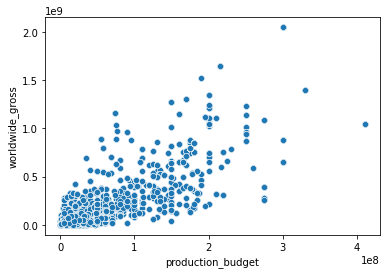

In [ ]:
# # Scatterplot of production_budget and worldwide_gross
sns.scatterplot(x=all_movies['production_budget'], y=all_movies['worldwide_gross'])


Text(0.5, 1.0, 'Production_budget against Worldwide_gross')

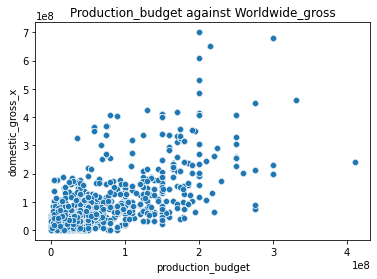

In [ ]:
# Scatterplot of production_budget and domestic_gross
sns.scatterplot(x=all_movies['production_budget'], y=all_movies['domestic_gross_x'])
# Title
plt.title('Production_budget against Worldwide_gross')

**Observation**
> There is a positive correlation between the production budget and the worldwide gross. This means that the higher the production budget, the higher the returns

In [ ]:
# Select columns to use
selected_columns = all_movies[['production_budget', 'domestic_gross_x', 'worldwide_gross']]
# Create a correlation matrix
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                   production_budget  domestic_gross_x  worldwide_gross
production_budget           1.000000          0.694802         0.763526
domestic_gross_x            0.694802          1.000000         0.946412
worldwide_gross             0.763526          0.946412         1.000000


Text(0.5, 1.0, 'Correlation Matrix for Movie Data')

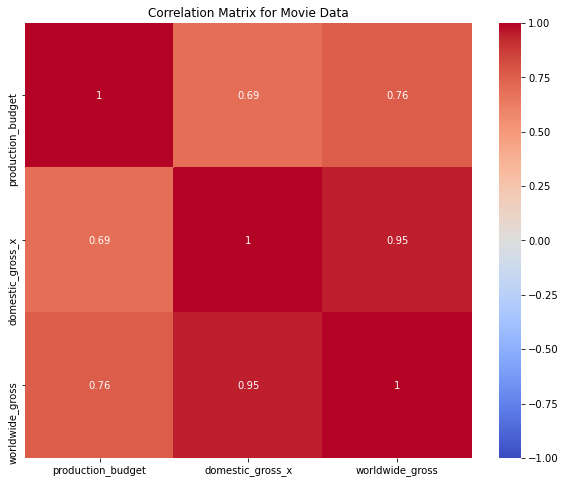

In [ ]:
# Plot the figure, axes
fig, ax=plt.subplots(figsize=(10, 8))
#Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# Title
plt.title("Correlation Matrix for Movie Data")


**Observation**
> The heatmap shows a positive correlation among the three values. This means that the higher the production budget, the higher the return in investment

**Objective 5: Assess the impact of a film's popularity score and average rating on its overall performance.**

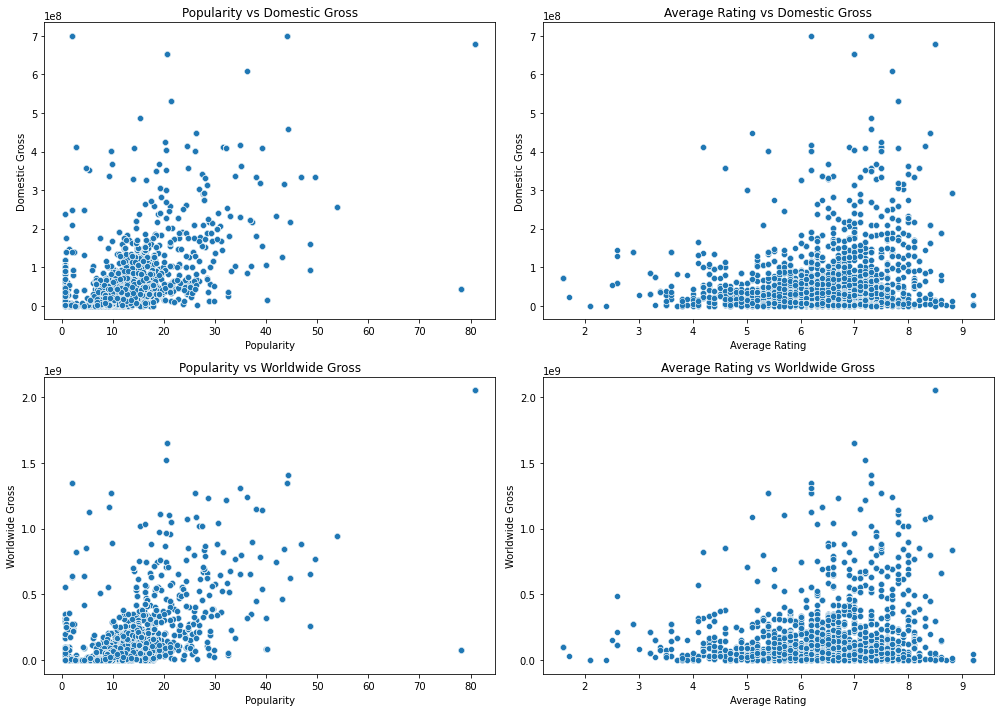

In [ ]:
# 'popularity', 'average_rating', 'domestic_gross', 'worldwide_gross'

# Set up the figure and axes for 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot of Popularity vs Domestic Gross
sns.scatterplot( data=all_movies, x='popularity', y='domestic_gross_x', ax=axes[0, 0])
axes[0, 0].set_title('Popularity vs Domestic Gross')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Domestic Gross')

# Scatter plot of Average Rating vs Domestic Gross
sns.scatterplot(data=all_movies, x='averagerating', y='domestic_gross_x', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating vs Domestic Gross')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Domestic Gross')

# Scatter plot of Popularity vs Worldwide Gross
sns.scatterplot(data=all_movies, x='popularity', y='worldwide_gross', ax=axes[1, 0])
axes[1, 0].set_title('Popularity vs Worldwide Gross')
axes[1, 0].set_xlabel('Popularity')
axes[1, 0].set_ylabel('Worldwide Gross')

# Scatter plot of Average Rating vs Worldwide Gross
sns.scatterplot(data=all_movies, x='averagerating', y='worldwide_gross', ax=axes[1, 1])
axes[1, 1].set_title('Average Rating vs Worldwide Gross')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Worldwide Gross')

# Adjust the layout so labels don't overlap
plt.tight_layout()

In [ ]:

popularity_rating=all_movies[['popularity','averagerating', 'domestic_gross_x', 'worldwide_gross']]

In [ ]:
correlation1=popularity_rating.corr()

<AxesSubplot:>

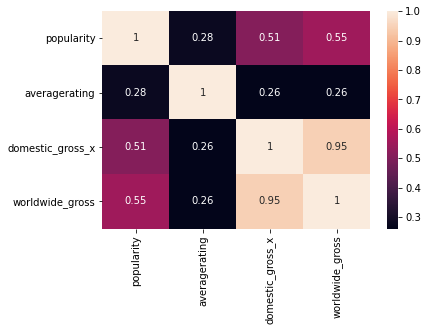

In [ ]:
sns.heatmap(correlation1, annot=True)

**Observation**
> The analysis reveals a weak positive correlation of 0.26 between the average rating and return on investment, indicating a slight association between these two variables, but not a strong predictive relationship. In contrast, there is a moderate positive correlation between popularity and return on investment, both domestically (0.51) and worldwide (0.55), suggesting that higher popularity tends to be more closely associated with better returns on investment, both in domestic and global markets.

## Statistical Analysis

**Evaluate the performance of various film genres in both domestic and international markets.**

>Null Hypothesis (H₀): There is no difference in the performance (domestic and international gross) across different genres.
>Alternative Hypothesis (H₁): There is a significant difference in the performance (domestic and international gross) across different genres.

In [ ]:
sample =all_movies['domestic_gross_x'].sample(n=50, random_state=40)

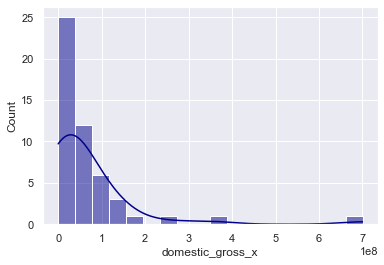

In [ ]:
sns.set_theme(color_codes=True)
sns.histplot(sample, kde=True, color='darkblue');

### Model Evaluation and Performance Metrics

#### Examine trends in movie revenues over time

Slope (trend per year): 0.0
Intercept: -7992268606.447076
R-squared: 0.022309977167532358
Predicted movie counts for future years: [1.32009761e+08 1.52069708e+08 1.72129654e+08]


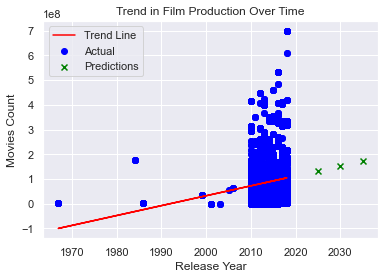

Domestic Gross Regression Results:
                             OLS Regression Results                            
Dep. Variable:       domestic_gross_x   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.03e-33
Time:                        20:18:17   Log-Likelihood:            -1.2902e+05
No. Observations:                6494   AIC:                         2.580e+05
Df Residuals:                    6492   BIC:                         2.581e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

In [ ]:
# Convert year from object to float
all_movies['release_year'] = pd.to_numeric(all_movies['release_year'], errors='coerce')

# Creating a release_year column
all_movies['release_year']=all_movies['release_date_y'].dt.year

# Convert foreign_gross values from object to float
all_movies['foreign_gross'] = pd.to_numeric(all_movies['foreign_gross'], errors='coerce')

# Drop the null values
all_movies = all_movies.dropna(subset=['release_year', 'domestic_gross_x', 'foreign_gross'])

# independent variable (year) and add a constant
X = sm.add_constant(all_movies['release_year'])

# Model 1: Year vs Domestic Gross
y_domestic = all_movies['domestic_gross_x']

# Create and fit the domestic model
model = LinearRegression()
model.fit(X, y_domestic)

# Examine the trend
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (trend per year): {slope}")
print(f"Intercept: {intercept}")

# R-squared
r_squared = model.score(X, y_domestic)
print(f"R-squared: {r_squared}")

# Model 2: Year vs Foreign Gross
y_foreign =all_movies['foreign_gross']

# Fit the OLS Regression model
domestic_model = sm.OLS(y_domestic, X).fit()
foreign_model = sm.OLS(y_foreign, X).fit()

# Predict future production
future_years = np.array([[2025], [2030], [2035]]).reshape(-1, 1)
future_years_with_constant = sm.add_constant(future_years)
future_predictions = model.predict(future_years_with_constant)
print("Predicted movie counts for future years:", future_predictions)

# Plot the results
plt.scatter(all_movies['release_year'], all_movies['domestic_gross_x'], color='blue', label='Actual')
plt.plot(all_movies['release_year'], model.predict(X), color='red', label='Trend Line')
plt.scatter(future_years, future_predictions, color='green', marker='x', label='Predictions')
plt.xlabel("Release Year")
plt.ylabel("Movies Count")
plt.title("Trend in Film Production Over Time")
plt.legend()
plt.show()

# Output the summary of both models
print("Domestic Gross Regression Results:\n", domestic_model.summary())
print("Foreign Gross Regression Results:\n", foreign_model.summary())

# Interpret the p-values for 'year' coefficient in both models
if domestic_model.pvalues['release_year'] < 0.05:
    print("There is a significant trend in domestic gross revenue over the years.")
else:
    print("No significant trend in domestic gross revenue over the years.")

if foreign_model.pvalues['release_year'] < 0.05:
    print("There is a significant trend in foreign gross revenue over the years.")
else:
    print("No significant trend in foreign gross revenue over the years.")

**Observation**
 > The regression analysis on domestic and foreign gross revenue indicates that both have statistically significant trends over the years, given the very low p-values for the release_year coefficient (p < 0.05 for both). However, the low R-squared values (0.022 for domestic and 0.019 for foreign) suggest that release_year explains only a small fraction of the variance in both gross revenues.

### Trend in Film Production Over Time

Slope (trend per year): 19.356038095238098
Intercept: -38417.74765714286
R-squared: 0.5322868178907546
Predicted movie counts for future years: [778.22948571 875.00967619 971.78986667]


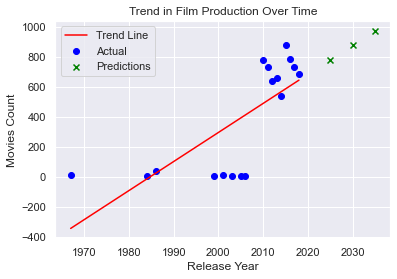

                                 OLS Regression Results                                
Dep. Variable:           movies_count   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              18.62
Date:                Wed, 13 Nov 2024   Prob (F-statistic):                    0.000533
Time:                        20:08:50   Log-Likelihood:                         -123.98
No. Observations:                  17   AIC:                                      250.0
Df Residuals:                      16   BIC:                                      250.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Number of movies per year
movies_per_year = all_movies['release_year'].value_counts().sort_index()

# Step 2: Convert movies_per_year to DataFrame for regression
movies_per_year_df = movies_per_year.reset_index()
movies_per_year_df.columns = ['release_year', 'movies_count']  # Rename for clarity

# Step 3: Define independent variable (X) and dependent variable (y)
X = movies_per_year_df[['release_year']]  # No constant added
y = movies_per_year_df['movies_count']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Examine the trend
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (trend per year): {slope}")
print(f"Intercept: {intercept}")

# R-squared
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Predict future production
future_years = np.array([[2025], [2030], [2035]]).reshape(-1, 1)
future_predictions = model.predict(future_years)
print("Predicted movie counts for future years:", future_predictions)

# Plot the results
plt.scatter(movies_per_year_df['release_year'], movies_per_year_df['movies_count'], color='blue', label='Actual')
plt.plot(movies_per_year_df['release_year'], model.predict(X), color='red', label='Trend Line')
plt.scatter(future_years, future_predictions, color='green', marker='x', label='Predictions')
plt.xlabel("Release Year")
plt.ylabel("Movies Count")
plt.title("Trend in Film Production Over Time")
plt.legend()
plt.show()

# Step 4: Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Step 5: Output the summary of the model
print(model.summary())

**Observation**
> The regression model provides insights into trends in film production over time. 

* Slope (19.36): On average, the count of movies produced each year increases by about 19.36 films.
* R-squared (0.53): Approximately 53% of the variance in movie production counts is explained by the year alone, indicating a moderate linear trend.

